In [51]:
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.datasets import boston_housing
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [52]:
(x_train,y_train),(x_test,y_test) = boston_housing.load_data()

In [53]:
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

In [54]:
model = Sequential([
    Input(shape=(x_train.shape[1],)),
    Dense(128,activation='relu'),
    Dense(64,activation='relu'),
    Dense(1,activation='linear')
])

In [55]:
model.compile(optimizer='adam',loss='mse',metrics=['mae'])
history = model.fit(x_train_scaled,y_train,epochs=50,validation_split=0.2,verbose=0)

In [56]:
test_mse, test_mae = model.evaluate(x_test_scaled, y_test)
print('Mean squared error on test data: ', test_mse)
print('Mean absolute error on test data: ', test_mae)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 19.8867 - mae: 2.9663
Mean squared error on test data:  25.581296920776367
Mean absolute error on test data:  3.2161920070648193


In [59]:
predictions = model.predict(x_test_scaled)
for i in range(5):
    print(f"Predicted: {predictions[i][0]:.2f} Actual: {y_test[i]}")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Predicted: 8.26 Actual: 7.2
Predicted: 17.45 Actual: 18.8
Predicted: 20.81 Actual: 19.0
Predicted: 31.37 Actual: 27.0
Predicted: 25.94 Actual: 22.2


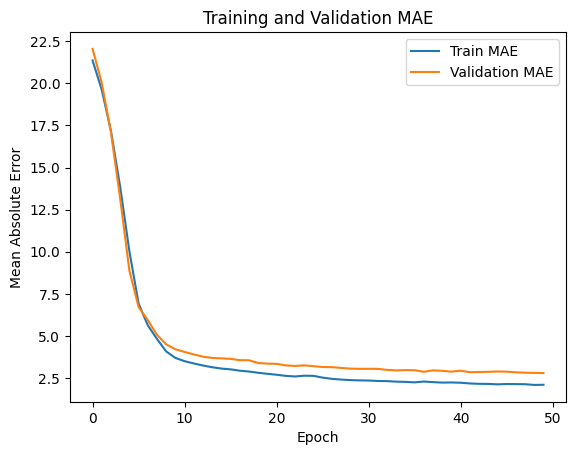

In [61]:
plt.plot(history.history['mae'], label='Train MAE')
plt.plot(history.history['val_mae'], label='Validation MAE')
plt.xlabel('Epoch')
plt.ylabel('Mean Absolute Error')
plt.title('Training and Validation MAE')
plt.legend()
plt.show()